In [789]:
#import pandas to read csv files
import pandas as pd 
import numpy as np
# import matplotlib for plots
import matplotlib.pyplot as plt
# import seaborn for plots
import seaborn as sns
# import warnings for ignoring the warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# To remove data coming in exponential scientific format
pd.options.display.float_format = '{:.2f}'.format

### CHECKPOINT 1

In [655]:
#Read companies csv file
companies = pd.read_csv(r'C:\Users\Admin\Downloads\Jupiter Notebook Python\Investment Analysis Assignment\companies.csv',encoding= 'unicode_escape')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [656]:
#Read rounds2 csv file
rounds = pd.read_csv(r"C:/Users/Admin/Downloads/Jupiter Notebook Python/Investment Analysis Assignment/rounds2.csv",encoding= 'unicode_escape')
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [657]:
#convert company_permalink into lower case as may be more then one company_permalink is present in upper case results duplication.

def get_lower_company_permalink(company_permalink): #Function which converts the company_permalink into lower case letters.
    return company_permalink.lower()

rounds['company_permalink'] = rounds['company_permalink'].apply(lambda company: get_lower_company_permalink(company))
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [658]:
#convert permalink into lower case as may be more then one permalink is present in upper case which results duplication

def get_lower_permalink(company_permalink):   #Function which converts the permalink into lower case letters.
    return company_permalink.lower()

companies['permalink'] = companies['permalink'].apply(lambda company: get_lower_permalink(company))
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Table1.1 
### 1.How many unique companies are present in rounds2 ?

In [659]:
#nunique() function return Series with number of distinct observations.
total_unique_companies_in_rounds = rounds['company_permalink'].nunique()
total_unique_companies_in_rounds

66370

### 2.How many unique companies are present in the companies file ?

In [660]:
total_unique_companies_in_companies = companies['permalink'].nunique()
total_unique_companies_in_companies


66368

In [661]:
#Merge the two dataframes into master_frame
master_frame = pd.merge(rounds, companies, left_on='company_permalink', right_on='permalink', how='left')
master_frame.shape

(114949, 16)

In [662]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


###      CHECKPOINT 2

### Check which column contains how many null values

In [663]:
master_frame.isnull().sum()
#As we can see there are 19990 null values present in the raised_amount_usd column. So, we have to remove these null values for correct analysis.

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [664]:
# Remove the null values from the raised_amount_usd column.
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      1
name                           2
homepage_url                4333
category_list               1045
status                         1
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15967
dtype: int64

In [665]:
# We need country code column in our dataframe so we remove null values from it.
master_frame = master_frame[~master_frame['country_code'].isnull()]
# Remove the null values from the category list in the master_frame dataframe as we need it for sector analysis.
master_frame = master_frame[~master_frame['category_list'].isnull()]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [666]:
# As we can see there is 1 null value in 'name' column of master_frame we have to remove this null value as we require this
# column later.
master_frame = master_frame[~master_frame['name'].isnull()]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61752
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [667]:
# We can group by funding_round_type of raised_amount_usd
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()


funding_round_type
angel                      971573.89
convertible_note          1337186.65
debt_financing           17167653.47
equity_crowdfunding        509897.97
grant                     4512698.29
non_equity_assistance      480753.38
post_ipo_debt           169451789.77
post_ipo_equity          66077058.57
private_equity           73938486.28
product_crowdfunding      1353226.91
secondary_market         84438532.25
seed                       747827.95
undisclosed              15891661.39
venture                  11724222.69
Name: raised_amount_usd, dtype: float64

#### As from the result we can see that venture funding type is most suitable for investment between 5M and 15M.

### CHECKPOINT 3 - Country Analysis

In [668]:
# Now we create a dataframe named top9 which contains top 9 highest funding countries with investment type of venture.To do this,
# First we identify the countries with investment type = venture
# Then we group by country_code and sum the raised_amount_usd corresponding to each country.
# At last we sort the country in descending order of raised_amount_usd. 
top9 = master_frame[master_frame['funding_round_type'] == 'venture'].groupby('country_code', as_index=False).sum().sort_values('raised_amount_usd', ascending=False).head(9)
top9

,country_code,raised_amount_usd
94,USA,420068029342.00
15,CHN,39338918773.00
29,GBR,20072813004.00
39,IND,14261508718.00
12,CAN,9482217668.00
28,FRA,7226851352.00
42,ISR,6854350477.00
21,DEU,6306921981.00
45,JPN,3167647127.00


### Now we keep the rows only with funding_round_type( venture ) and country code('usa','chn','gbr','ind','can','fra','isr','deu','jpn') in master frame 

In [669]:
modify_master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
modify_master_frame = modify_master_frame[modify_master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
modify_master_frame.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.00,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008


### CHECKPOINT 4 - Sector Analysis

In [670]:
# Read the mapping.csv
mapping = pd.read_csv(r'C:/Users/Admin/Downloads/Jupiter Notebook Python/Investment Analysis Assignment/mapping.csv')
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [671]:
# As we can see there are some null values in the category list column of the mapping dataframe
mapping = mapping[~mapping['category_list'].isnull()]
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [672]:
# Now find the primary sector from each category list in the master_frame dataframe.
# This function returns the primary sector from given category list by extracting first character before the pipe.
def get_primary_sector(category):
    return category.split('|')[0]

modify_master_frame['primary_sector'] = modify_master_frame['category_list'].apply( lambda category: get_primary_sector(category))
modify_master_frame.head(8)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Education


In [673]:
# As we can see there are some (0) printed instead of (na)
mapping[mapping['category_list'].str.contains('0')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


In [674]:
# Replace the (0) by (na) in the category list of the 
def replace_0_by_na(category):
    if category[len(category)-1] != '0':
        return category.replace('0','na')
    else:
        return category   # We cannot replace '0' by 'na' whose category list ends with '0' in the category list of mapping,
                            # As '0' not is replace by 'na' whose category list ends with '0' in the category list of the modify_master_ frame dataframe.
mapping['category_list'] = mapping['category_list'].apply( lambda category : replace_0_by_na(category))

In [675]:
# Melt function is used to convert wider dataframe into longer dataframe.
melt_category_list = pd.melt(mapping, id_vars = ['category_list'], var_name=['main_sector']) 
melt_category_list.head(20)

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [676]:
# As we can see, we have rows of value column with (0) value.
# but we need only those rows who have (0) value of value column.
melt_category_list = melt_category_list[melt_category_list['value'] == 1]
melt_category_list.head(10)

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
56,Bicycles,Automotive & Sports,1
68,Boating Industry,Automotive & Sports,1
86,CAD,Automotive & Sports,1
92,Cars,Automotive & Sports,1
187,Design,Automotive & Sports,1


In [677]:
# Now, the dataframe contains category_list mapping to its main sector.
# Now, we don't need value column, so we can drop it.
melt_category_list = melt_category_list.drop('value',1)
melt_category_list.head(10)

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
56,Bicycles,Automotive & Sports
68,Boating Industry,Automotive & Sports
86,CAD,Automotive & Sports
92,Cars,Automotive & Sports
187,Design,Automotive & Sports


In [678]:
# Convert the primary_sector of modify_master_dataframe and category_list of melt_category_list into the lower case letters
# so that data remains consistent.
def get_lower_case_category(category):  # This function converts the category_list and primary_sector into the lower case. 
    return category.lower()

# Call the get_lower_Case_category function to convert values of primary_sector of modify_master_frame into lower case letters.
modify_master_frame['primary_sector'] = modify_master_frame['primary_sector'].apply( lambda sector: get_lower_case_category(sector))

# Call the get_lower_Case_category function to convert values of category_list of melt_category_list into lower case letters.
melt_category_list['category_list'] = melt_category_list['category_list'].apply( lambda category: get_lower_case_category(category))


In [679]:
# Merge the two dataframes melt_category_list and modify_master_frame into one dataframe.
merge_main_primary_df = pd.merge(modify_master_frame, melt_category_list, left_on = 'primary_sector', right_on = 'category_list', how = 'left')
merge_main_primary_df.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,apps,"News, Search and Messaging"
7,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,education,education,Others
8,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,curated web,curated web,"News, Search and Messaging"
9,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.00,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,curated web,curated web,"News, Search and Messaging"


In [680]:
# As we see in the merge_main_primary_df dataframe category_list_y column contains the same values as primary_sector
# contains, so we can drop the category_list_y column.

merge_main_primary_df = merge_main_primary_df.drop('category_list_y',1)
merge_main_primary_df.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging"
7,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,education,Others
8,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,curated web,"News, Search and Messaging"
9,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.00,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,curated web,"News, Search and Messaging"


### CHECKPOINT 5 - Sector Analysis 2

In [681]:
# Create a dataframe of named D1 which contains all the rows related to the USA country_code and having range of funding
# between 5M to 15M USD.
D1 = merge_main_primary_df[( merge_main_primary_df['country_code'] == 'USA' ) & ( ( merge_main_primary_df['raised_amount_usd'] >= 5000000 ) & ( merge_main_primary_df['raised_amount_usd'] <= 15000000 ) )]
D1.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging"
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others
31,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
32,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
33,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
34,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
35,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
41,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.00,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,software,Others
46,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.00,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,education,Others


In [682]:
# Create a dataframe of named D2 which contains all the rows related to the GBR country_code
D2 = merge_main_primary_df[( merge_main_primary_df['country_code'] == 'GBR' ) & ( ( merge_main_primary_df['raised_amount_usd'] >= 5000000 ) & ( merge_main_primary_df['raised_amount_usd'] <= 15000000 ) )]
D2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
135,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising"
310,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment
311,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment
336,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment
337,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment
406,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.00,/organization/abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,biotechnology,Cleantech / Semiconductors
483,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,10000000.00,/organization/acacia-pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,biotechnology,Cleantech / Semiconductors
496,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,NaN,15-06-2011,9910333.00,/organization/acal-energy,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,01-08-2004,clean technology,Cleantech / Semiconductors
499,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,03-06-2014,10720178.00,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,information technology,"Social, Finance, Analytics, Advertising"
534,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,NaN,01-07-2013,8300000.00,/organization/accent-media-ltd,Accent Media Limited,http://accent.media,Domains|Internet|Ticketing,operating,GBR,H9,London,London,21-02-2012,domains,"News, Search and Messaging"


In [683]:
# Create a dataframe of named D3 which contains all the rows related to the IND country_code
D3 = merge_main_primary_df[( merge_main_primary_df['country_code'] == 'IND' ) & ( ( merge_main_primary_df['raised_amount_usd'] >= 5000000 ) & ( merge_main_primary_df['raised_amount_usd'] <= 15000000 ) )]
D3.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
74,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others
367,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.00,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising"
1066,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.00,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,entertainment,Entertainment
1448,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.00,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,finance,"Social, Finance, Analytics, Advertising"
1738,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,01-07-2014,5000000.00,/organization/akosha,Akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,01-06-2010,consumer internet,"Social, Finance, Analytics, Advertising"
2187,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.00,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,advertising,"Social, Finance, Analytics, Advertising"
2297,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.00,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,software,Others
2523,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.00,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,automotive,Automotive & Sports
2550,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,B,26-03-2014,5000000.00,/organization/annapurna-microfinace,Annapurna Microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,01-01-2009,finance,"Social, Finance, Analytics, Advertising"


In [684]:
# Now, we have to check whether any null values present in main_sector column of dataframe D1
D1['main_sector'].isnull().sum()

1

In [685]:
# As, we can see there is 1 null value in column main sector of D1 dataframe, we have to remove that null values
D1 = D1[~D1['main_sector'].isnull()]
D1['main_sector'].isnull().sum()

0

In [686]:
# Now, we have to check whether any null values present in main_sector column of dataframe D2
D2['main_sector'].isnull().sum()

0

In [687]:
# Now, we have to check whether any null values present in main_sector column of dataframe D3
D3['main_sector'].isnull().sum()
# As we can see there is no null value present in the D3 dataframe, so we dont need to remove any row.

0

In [688]:
# Now, we have to find the total number of investments for each main_sector in dataframe D1
D1_count_of_invest = D1.groupby('main_sector', as_index=False).count()

# We change the column name of primary_sector to count_of_investements
D1_count_of_invest = D1_count_of_invest.rename(columns={"primary_sector": "count_of_investments"})

# We want only two columns main_sector and count_of_investments, so we access it from the D1_count_of_invest dataframe.
D1_count_of_invest = D1_count_of_invest[['main_sector','count_of_investments']]
D1_count_of_invest

,main_sector,count_of_investments
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2350
2,Entertainment,591
3,Health,909
4,Manufacturing,799
5,"News, Search and Messaging",1583
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714


In [689]:
# Now, we calculate the total amount of investment in each main_sector
D1_sum_of_invest = D1.groupby('main_sector', as_index=False).sum()
D1_sum_of_invest

,main_sector,raised_amount_usd
0,Automotive & Sports,1454104361.00
1,Cleantech / Semiconductors,21633430822.00
2,Entertainment,5099197982.00
3,Health,8211859357.00
4,Manufacturing,7258553378.00
5,"News, Search and Messaging",13971567428.00
6,Others,26321007002.00
7,"Social, Finance, Analytics, Advertising",23807376964.00


In [690]:
# Now, we merge two dataframes D1_count_of_invest and D1_sum_of_invest to get columns count_of_investments
# and raised_amount_usd
D1_merge_count_sum_invest = pd.merge(D1_count_of_invest,D1_sum_of_invest, on='main_sector', how='left')
D1_merge_count_sum_invest

,main_sector,count_of_investments,raised_amount_usd
0,Automotive & Sports,167,1454104361.00
1,Cleantech / Semiconductors,2350,21633430822.00
2,Entertainment,591,5099197982.00
3,Health,909,8211859357.00
4,Manufacturing,799,7258553378.00
5,"News, Search and Messaging",1583,13971567428.00
6,Others,2950,26321007002.00
7,"Social, Finance, Analytics, Advertising",2714,23807376964.00


In [691]:
# Now, we merge the two dataframes D1 and D1_merge_count_sum_invest to get all the data.
D1 = pd.merge(D1, D1_merge_count_sum_invest, on = 'main_sector', how='left')
D1.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,raised_amount_usd_y
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",2714,23807376964.00
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging",1583,13971567428.00
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others,2950,26321007002.00
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
5,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
6,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
7,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
8,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.00,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,software,Others,2950,26321007002.00
9,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.00,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,education,Others,2950,26321007002.00


In [692]:
# Change the column name of raised_amount_usd_y to amount_of_investments for better understanding
D1 = D1.rename(columns={'raised_amount_usd_y': 'amount_of_investments'})
D1.head(15)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,amount_of_investments
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",2714,23807376964.00
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging",1583,13971567428.00
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others,2950,26321007002.00
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
5,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
6,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
7,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
8,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.00,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,software,Others,2950,26321007002.00
9,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.00,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,education,Others,2950,26321007002.00


In [693]:
# Now, we have to find the total number of investments for each main_sector in dataframe D2
D2_count_of_invest = D2.groupby('main_sector', as_index=False).count()

# We change the column name of primary_sector to count_of_investements
D2_count_of_invest = D2_count_of_invest.rename(columns={"primary_sector": "count_of_investments"})

# We want only two columns main_sector and count_of_investments, so we access it from the D1_count_of_invest dataframe.
D2_count_of_invest = D2_count_of_invest[['main_sector','count_of_investments']]
D2_count_of_invest

,main_sector,count_of_investments
0,Automotive & Sports,16
1,Cleantech / Semiconductors,130
2,Entertainment,56
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,147
7,"Social, Finance, Analytics, Advertising",133


In [694]:
# Now, we calculate the total amount of investment in each main_sector
D2_sum_of_invest = D2.groupby('main_sector', as_index=False).sum()
D2_sum_of_invest

,main_sector,raised_amount_usd
0,Automotive & Sports,167051565.00
1,Cleantech / Semiconductors,1163990056.00
2,Entertainment,482784687.00
3,Health,214537510.00
4,Manufacturing,361940335.00
5,"News, Search and Messaging",615746235.00
6,Others,1283624289.00
7,"Social, Finance, Analytics, Advertising",1089404014.00


In [695]:
# Now, we merge two dataframes D2_count_of_invest and D2_sum_of_invest to get columns count_of_investments
# and raised_amount_usd
D2_merge_count_sum_invest = pd.merge(D2_count_of_invest,D2_sum_of_invest, on='main_sector', how='left')
D2_merge_count_sum_invest

,main_sector,count_of_investments,raised_amount_usd
0,Automotive & Sports,16,167051565.00
1,Cleantech / Semiconductors,130,1163990056.00
2,Entertainment,56,482784687.00
3,Health,24,214537510.00
4,Manufacturing,42,361940335.00
5,"News, Search and Messaging",73,615746235.00
6,Others,147,1283624289.00
7,"Social, Finance, Analytics, Advertising",133,1089404014.00


In [696]:
# Now, we merge the two dataframes D2 and D2_merge_count_sum_invest to get all the data.
D2 = pd.merge(D2, D2_merge_count_sum_invest, on = 'main_sector', how='left')
D2.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,raised_amount_usd_y
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising",133,1089404014.00
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,56,482784687.00
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,56,482784687.00
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,56,482784687.00
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,56,482784687.00
5,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.00,/organization/abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,biotechnology,Cleantech / Semiconductors,130,1163990056.00
6,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,10000000.00,/organization/acacia-pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,biotechnology,Cleantech / Semiconductors,130,1163990056.00
7,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,NaN,15-06-2011,9910333.00,/organization/acal-energy,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,01-08-2004,clean technology,Cleantech / Semiconductors,130,1163990056.00
8,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,03-06-2014,10720178.00,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,information technology,"Social, Finance, Analytics, Advertising",133,1089404014.00
9,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,NaN,01-07-2013,8300000.00,/organization/accent-media-ltd,Accent Media Limited,http://accent.media,Domains|Internet|Ticketing,operating,GBR,H9,London,London,21-02-2012,domains,"News, Search and Messaging",73,615746235.00


In [697]:
# Change the column name of raised_amount_usd_y to amount_of_investments for better understanding
D2 = D2.rename(columns={'raised_amount_usd_y': 'amount_of_investments'})
D2.head(15)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,amount_of_investments
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising",133,1089404014.00
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,56,482784687.00
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,56,482784687.00
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,56,482784687.00
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,56,482784687.00
5,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.00,/organization/abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,biotechnology,Cleantech / Semiconductors,130,1163990056.00
6,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,10000000.00,/organization/acacia-pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,biotechnology,Cleantech / Semiconductors,130,1163990056.00
7,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,NaN,15-06-2011,9910333.00,/organization/acal-energy,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,01-08-2004,clean technology,Cleantech / Semiconductors,130,1163990056.00
8,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,03-06-2014,10720178.00,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,information technology,"Social, Finance, Analytics, Advertising",133,1089404014.00
9,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,NaN,01-07-2013,8300000.00,/organization/accent-media-ltd,Accent Media Limited,http://accent.media,Domains|Internet|Ticketing,operating,GBR,H9,London,London,21-02-2012,domains,"News, Search and Messaging",73,615746235.00


In [698]:
# Now, we have to find the total number of investments for each main_sector in dataframe D3
D3_count_of_invest = D3.groupby('main_sector', as_index=False).count()

# We change the column name of primary_sector to count_of_investements
D3_count_of_invest = D3_count_of_invest.rename(columns={"primary_sector": "count_of_investments"})

# We want only two columns main_sector and count_of_investments, so we access it from the D3_count_of_invest dataframe.
D3_count_of_invest = D3_count_of_invest[['main_sector','count_of_investments']]
D3_count_of_invest

,main_sector,count_of_investments
0,Automotive & Sports,13
1,Cleantech / Semiconductors,20
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,110
7,"Social, Finance, Analytics, Advertising",60


In [699]:
# Now, we calculate the total amount of investment in each main_sector
D3_sum_of_invest = D3.groupby('main_sector', as_index=False).sum()
D3_sum_of_invest

,main_sector,raised_amount_usd
0,Automotive & Sports,136900000.00
1,Cleantech / Semiconductors,165380000.00
2,Entertainment,280830000.00
3,Health,167740000.00
4,Manufacturing,200900000.00
5,"News, Search and Messaging",433834545.00
6,Others,1013409507.00
7,"Social, Finance, Analytics, Advertising",550549550.00


In [700]:
# Now, we merge two dataframes D3_count_of_invest and D3_sum_of_invest to get columns count_of_investments
# and raised_amount_usd
D3_merge_count_sum_invest = pd.merge(D3_count_of_invest,D3_sum_of_invest, on='main_sector', how='left')
D3_merge_count_sum_invest

,main_sector,count_of_investments,raised_amount_usd
0,Automotive & Sports,13,136900000.00
1,Cleantech / Semiconductors,20,165380000.00
2,Entertainment,33,280830000.00
3,Health,19,167740000.00
4,Manufacturing,21,200900000.00
5,"News, Search and Messaging",52,433834545.00
6,Others,110,1013409507.00
7,"Social, Finance, Analytics, Advertising",60,550549550.00


In [701]:
# Now, we merge the two dataframes D3 and D3_merge_count_sum_invest to get all the data.
D3 = pd.merge(D3, D3_merge_count_sum_invest, on = 'main_sector', how='left')
D3.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,raised_amount_usd_y
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,33,280830000.00
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others,110,1013409507.00
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.00,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
3,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.00,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,entertainment,Entertainment,33,280830000.00
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.00,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
5,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,01-07-2014,5000000.00,/organization/akosha,Akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,01-06-2010,consumer internet,"Social, Finance, Analytics, Advertising",60,550549550.00
6,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.00,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,advertising,"Social, Finance, Analytics, Advertising",60,550549550.00
7,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.00,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,software,Others,110,1013409507.00
8,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.00,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,automotive,Automotive & Sports,13,136900000.00
9,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,B,26-03-2014,5000000.00,/organization/annapurna-microfinace,Annapurna Microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,01-01-2009,finance,"Social, Finance, Analytics, Advertising",60,550549550.00


In [702]:
# Change the column name of raised_amount_usd_y to amount_of_investments for better understanding
D3 = D3.rename(columns={'raised_amount_usd_y': 'amount_of_investments'})
D3.head(15)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,amount_of_investments
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,33,280830000.00
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others,110,1013409507.00
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.00,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
3,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.00,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,entertainment,Entertainment,33,280830000.00
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.00,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
5,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,01-07-2014,5000000.00,/organization/akosha,Akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,01-06-2010,consumer internet,"Social, Finance, Analytics, Advertising",60,550549550.00
6,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.00,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,advertising,"Social, Finance, Analytics, Advertising",60,550549550.00
7,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.00,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,software,Others,110,1013409507.00
8,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.00,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,automotive,Automotive & Sports,13,136900000.00
9,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,B,26-03-2014,5000000.00,/organization/annapurna-microfinace,Annapurna Microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,01-01-2009,finance,"Social, Finance, Analytics, Advertising",60,550549550.00


### Table 5.1

### 1. Total number of investments - Country 1 

In [773]:
# Sum the values of column count_of_investments to get the number of investments in country 1 
count_of_invest_in_C1 = D1['count_of_investments'].unique().sum()
count_of_invest_in_C1


12063

### 1. Total number of investments - Country 2

In [774]:
# Sum the values of column count_of_investments to get the number of investments in country 2
count_of_invest_in_C2 = D2['count_of_investments'].unique().sum()
count_of_invest_in_C2

621

### 1. Total number of investments - Country 3

In [775]:
# Sum the values of column count_of_investments to get the number of investments in country 3
count_of_invest_in_C3 = D3['count_of_investments'].unique().sum()
count_of_invest_in_C3

328

### 2. Total amount of investment - Country 1

In [706]:
# Sum the values of the column amount_of_investments to get the total amount of investment in country 1.
amount_of_invest_in_C1 = D1['amount_of_investments'].unique().sum()
amount_of_invest_in_C1/1000000

107757.097294

### 2. Total amount of investment - Country 2

In [707]:
# Sum the values of the column amount_of_investments to get the total amount of investment in country 2.
amount_of_invest_in_C2 = D2['amount_of_investments'].unique().sum()
amount_of_invest_in_C2/1000000

5379.078691

### 2. Total amount of investment - Country  3

In [577]:
# Sum the values of the column amount_of_investments to get the total amount of investment in country 3.
amount_of_invest_in_C3 = D3['amount_of_investments'].unique().sum()
amount_of_invest_in_C3/1000000

2949.543602

### 3. Top Sector name ( number of investment - wise ) - Country 1

In [708]:
# Calculate the top sector name which received highest number of investments in country 1.
# First we sort the values of count_of_investments column of dataframe D1.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 0th row and 0th column i.e (0,0)
D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[0,0]

'Others'

### 3. Top Sector name ( number of investment - wise ) - Country 2

In [709]:
# Calculate the top sector name which received highest number of investments in country 2.
# First we sort the values of count_of_investments column of dataframe D2.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 0th row and 0th column i.e (0,0)
D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[0,0]

'Others'

### 3. Top Sector name ( number of investment - wise ) - Country 3

In [710]:
# Calculate the top sector name which received highest number of investments in country 3.
# First we sort the values of count_of_investments column of dataframe D3.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 0th row and 0th column i.e (0,0)
D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[0,0]

'Others'

### 4. Second Sector name ( number of investment - wise ) - Country 1

In [711]:
# Calculate the second sector name which received the highest number of investments in country 1.
# For that, first we sort the values of count_of_investments column of dataframe D1.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 1st row and 0th column i.e (1,0)
D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[1,0]

'Social, Finance, Analytics, Advertising'

### 4. Second Sector name ( number of investment - wise ) - Country 2

In [712]:
# Calculate the second sector name which received the highest number of investments in country 2.
# For that, first we sort the values of count_of_investments column of dataframe D2.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 1st row and 0th column i.e (1,0)
D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[1,0]

'Social, Finance, Analytics, Advertising'

### 4. Second Sector name ( number of investment - wise ) - Country 3

In [713]:
# Calculate the second sector name which received the highest number of investments in country 3.
# For that, first we sort the values of count_of_investments column of dataframe D3.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 1st row and 0th column i.e (1,0)
D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[1,0]

'Social, Finance, Analytics, Advertising'

### 5. Third Sector name ( number of investment - wise ) - Country 1

In [714]:
# Calculate the third sector name which received the highest number of investments in country 1.
# For that, first we sort the values of count_of_investments column of dataframe D1.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 2nd row and 0th column i.e (2,0)
D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[2,0]

'Cleantech / Semiconductors'

### 5. Third Sector name ( number of investment - wise ) - Country 2

In [715]:
# Calculate the third sector name which received the highest number of investments in country 2.
# For that, first we sort the values of count_of_investments column of dataframe D2.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 2nd row and 0th column i.e (2,0)
D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[2,0]

'Cleantech / Semiconductors'

### 5. Third Sector name ( number of investment - wise ) - Country 3

In [716]:
# Calculate the third sector name which received the highest number of investments in country 3.
# For that, first we sort the values of count_of_investments column of dataframe D3.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 2nd row and 0th column i.e (2,0)
D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[2,0]

'News, Search and Messaging'

### 6. Number of investment in top sector - Country 1

In [717]:
# Calculate the number of investments in top sector of country 1.
# For that, first we sort the values of count_of_investments column of dataframe D1.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 0th row and 1st column i.e (0,1)
D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[0,1]

2950

### 6. Number of investment in top sector - Country 2

In [718]:
# Calculate the number of investments in top sector of country 2.
# For that, first we sort the values of count_of_investments column of dataframe D2.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 0th row and 1st column i.e (0,1)
D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[0,1]

147

### 6. Number of investments in top sector - Country 3

In [719]:
# Calculate the number of investments in top sector of country 3.
# For that, first we sort the values of count_of_investments column of dataframe D3.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 0th row and 1st column i.e (0,1)
D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[0,1]

110

### 7. Number of investments in second best sector - Country 1

In [720]:
# Calculate the number of investments in second best sector of country 1.
# For that, first we sort the values of count_of_investments column of dataframe D1.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 1st row and 1st column i.e (1,1)
D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[1,1]

2714

### 7. Number of investments in second best sector - Country 2

In [721]:
# Calculate the number of investments in second best sector of country 2.
# For that, first we sort the values of count_of_investments column of dataframe D2.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 1st row and 1st column i.e (1,1)
D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[1,1]

133

### 7. Number of investments in second best sector - Country 3

In [722]:
# Calculate the number of investments in second best sector of country 3.
# For that, first we sort the values of count_of_investments column of dataframe D3.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 1st row and 1st column i.e (1,1)
D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[1,1]

60

### 8. Number of investments in third best sector - Country 1

In [723]:
# Calculate the number of investments in third best sector of country 1.
# For that, first we sort the values of count_of_investments column of dataframe D1.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 2nd row and 1st column i.e (2,1)
D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[2,1]

2350

### 8. Number of investments in third best sector - Country 2

In [724]:
# Calculate the number of investments in third best sector of country 2.
# For that, first we sort the values of count_of_investments column of dataframe D2.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 2nd row and 1st column i.e (2,1)
D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[2,1]

130

### 8. Number of investments in third best sector - Country 3

In [725]:
# Calculate the number of investments in third best sector of country 3.
# For that, first we sort the values of count_of_investments column of dataframe D3.
# After that we remove the duplicates in column main_sector and then we access the two columns main_sector and 
# count_of_investments and then we access the highest number of investments accroding to sector wise by accessing the
# value of 2nd row and 1st column i.e (2,1)
D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments']].iloc[2,1]

52

### 9. Top Sector count - wise, which company received the highest investment - Country 1

In [726]:
# First of all we pick only that rows whose main sector is 'others'.
# Then we group by 'name' column and sum the numeric values and at last sort the rows by 'raised_amount_usd_x' column
# in descending order and access the value by selecting 0th row and 0th column using 'iloc' function.
D1_by_others = D1[D1['main_sector'] == 'Others']
D1_by_others = D1_by_others.groupby('name', as_index=False).sum().sort_values('raised_amount_usd_x', ascending=False)
D1_by_others.iloc[0,0]

'Virtustream'

### 9. Top Sector count - wise, which company received the highest investment - Country 2

In [727]:
# First of all we pick only that rows whose main sector is 'others'.
# Then we group by 'name' column and sum the numeric values and at last sort the rows by 'raised_amount_usd_x' column
# in descending order and access the value by selecting 0th row and 0th column using 'iloc' function.
D2_by_others = D2[D2['main_sector'] == 'Others']
D2_by_others = D2_by_others.groupby('name', as_index=False).sum().sort_values('raised_amount_usd_x', ascending=False)
D2_by_others.iloc[0,0]

'Electric Cloud'

### 9. Top Sector count - wise, which company received the highest investment - Country 3

In [728]:
# First of all we pick only that rows whose main sector is 'others'.
# Then we group by 'name' column and sum the numeric values and at last sort the rows by 'raised_amount_usd_x' column
# in descending order and access the value by selecting 0th row and 0th column using 'iloc' function.
D3_by_others = D3[D3['main_sector'] == 'Others']
D3_by_others = D3_by_others.groupby('name', as_index=False).sum().sort_values('raised_amount_usd_x', ascending=False)
D3_by_others.iloc[0,0]

'FirstCry.com'

### 10. Second best Sector count - wise, which company received the highest investment - Country 1

In [729]:
# First of all we pick only that rows whose main sector is 'Social, Finance, Analytics, Advertising'.
# Then we group by 'name' column and sum the numeric values and at last sort the rows by 'raised_amount_usd_x' column
# in descending order and access the value by selecting 0th row and 0th column using 'iloc' function.
D1_by_others = D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising']
D1_by_others = D1_by_others.groupby('name', as_index=False).sum().sort_values('raised_amount_usd_x', ascending=False)
D1_by_others.iloc[0,0]

'SST Inc. (Formerly ShotSpotter)'

### 10. Second best Sector count - wise, which company received the highest investment - Country 2

In [730]:
# First of all we pick only that rows whose main sector is 'Social, Finance, Analytics, Advertising'.
# Then we group by 'name' column and sum the numeric values and at last sort the rows by 'raised_amount_usd_x' column
# in descending order and access the value by selecting 0th row and 0th column using 'iloc' function.
D2_by_others = D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising']
D2_by_others = D2_by_others.groupby('name', as_index=False).sum().sort_values('raised_amount_usd_x', ascending=False)
D2_by_others.iloc[0,0]

'Celltick Technologies'

### 10. Second best Sector count - wise, which company received the highest investment - Country 3

In [731]:
# First of all we pick only that rows whose main sector is 'Social, Finance, Analytics, Advertising'.
# Then we group by 'name' column and sum the numeric values and at last sort the rows by 'raised_amount_usd_x' column
# in descending order and access the value by selecting 0th row and 0th column using 'iloc' function.
D3_by_others = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising']
D3_by_others = D3_by_others.groupby('name', as_index=False).sum().sort_values('raised_amount_usd_x', ascending=False)
D3_by_others.iloc[0,0]

'Manthan Systems'

### CHECKPOINT 6 - PLOTS

In [732]:
# Now we keep only those rows whose funding type is venture, seed, angel, private_equity
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'private_equity')]
# Convert values of column raised_amount_usd into million usd by dividing it by 1000000.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.70,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.04,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.72,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


#### A Plot showing the fraction of total investments (globally) in angel, venture, seed and private equity, and the average amount of investment in each funding type.

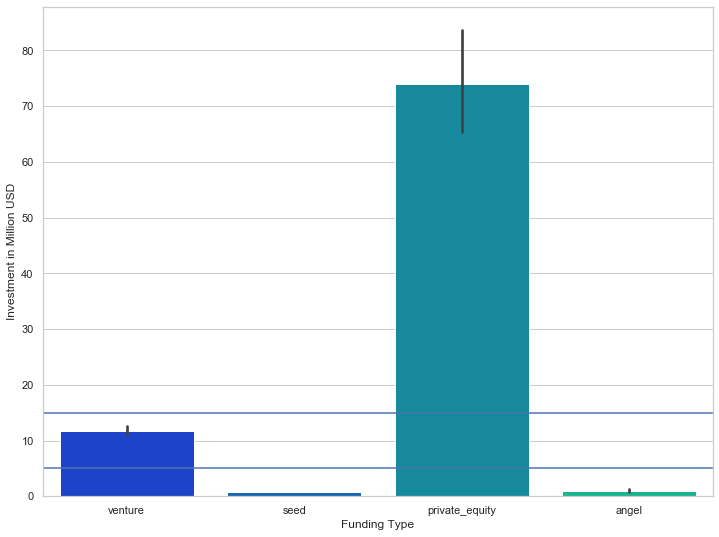

In [737]:
# We use the seaborn for barplot to show the fraction of total investment and the average amount of investment 
plt.figure(figsize=(12,9))
sns.set(style="whitegrid")
ax = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, palette='winter')
ax.set(xlabel='Funding Type', ylabel='Investment in Million USD')
ax.axhline(5)
ax.axhline(15)

#### A Plot showing the top 9 countries against the total amount of investments of funding type FT.  This should make the top 3 countries (Country 1, Country 2, Country 3) very clear.

In [735]:
# Convert values of column raised_amount_usd into million usd by dividing it by 1000000.
top9['raised_amount_usd'] = top9['raised_amount_usd']/1000000
top9

,country_code,raised_amount_usd
94,USA,420068.03
15,CHN,39338.92
29,GBR,20072.81
39,IND,14261.51
12,CAN,9482.22
28,FRA,7226.85
42,ISR,6854.35
21,DEU,6306.92
45,JPN,3167.65


[Text(0, 0.5, 'Investment in Million USD'), Text(0.5, 0, 'Countries')]

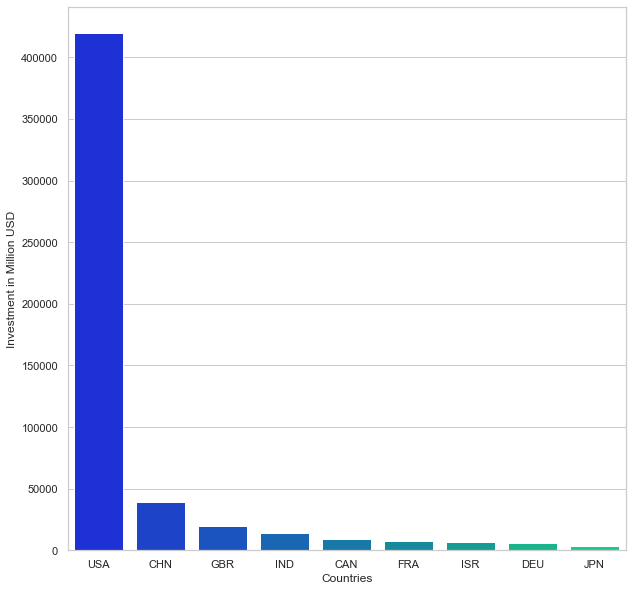

In [738]:
# We use the seaborn for barplot to show the investment of top9 countries of funding type FT. 
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.barplot(x='country_code', y='raised_amount_usd', data=top9, palette='winter')
ax.set(xlabel='Countries', ylabel='Investment in Million USD')

In [753]:
# We extract the values of the column main_sector, count_of_investments and country_code from dataframe D1.
main_sectors_D1 = D1.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments','country_code']]
# We extract the values of the column main_sector, count_of_investments and country_code from dataframe D2.
main_sectors_D2 = D2.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments','country_code']]
# We extract the values of the column main_sector, count_of_investments and country_code from dataframe D3.
main_sectors_D3 = D3.sort_values('count_of_investments', ascending=False).drop_duplicates(subset='main_sector').loc[:,['main_sector','count_of_investments','country_code']]

In [762]:
# Now we concat the three dataframes.
merge_main_sectors_D1_D2_D3 = pd.concat([main_sectors_D1,main_sectors_D2,main_sectors_D3])
merge_main_sectors_D1_D2_D3

,main_sector,count_of_investments,country_code
8354,Others,2950,USA
5439,"Social, Finance, Analytics, Advertising",2714,USA
8936,Cleantech / Semiconductors,2350,USA
1775,"News, Search and Messaging",1583,USA
1256,Health,909,USA
6956,Manufacturing,799,USA
4974,Entertainment,591,USA
7996,Automotive & Sports,167,USA
620,Others,147,GBR
590,"Social, Finance, Analytics, Advertising",133,GBR


 #### A Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart ( for the chosen investment type FT)

[Text(0, 0.5, 'Number of investments in main sectors'),
 Text(0.5, 0, 'Countries')]

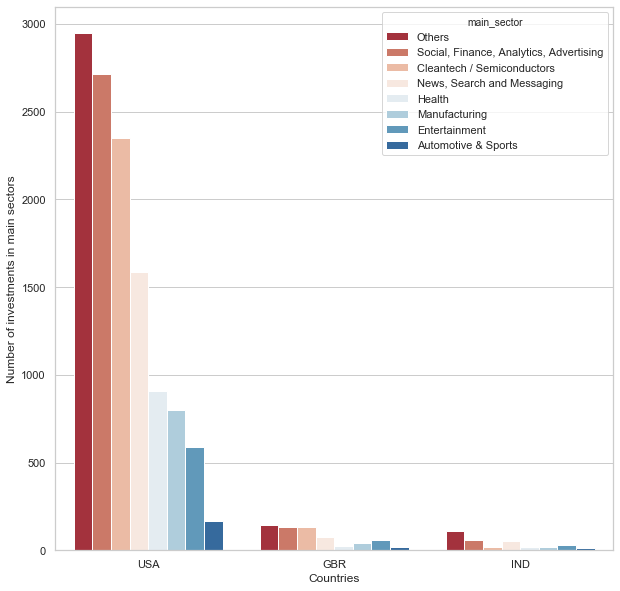

In [765]:
# We use the seaborn for barplot to show the number of investments in top3 sectors of the top3 countries  
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.barplot(x='country_code', y='count_of_investments', hue='main_sector',data=merge_main_sectors_D1_D2_D3, palette='RdBu')
ax.set(xlabel='Countries', ylabel='Number of investments in main sectors')